Copyright 2020 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# $K$-Nearest Neighbor Regression: Problem solving

In this session, we will look at another dataset, `mpg`, that examines the performance of cars from the 1970s.
The variables in it are:

| Variable | Description                              |
|----------|:------------------------------------------|
| mpg      | Miles/(US) gallon                        |
| cyl      | Number of cylinders                      |
| disp     | Displacement (cu.in.)                    |
| hp       | Gross horsepower                         |
| drat     | Rear axle ratio                          |
| wt       | Weight (1000 lbs)                        |
| qsec     | 1/4 mile time                            |
| vs       | Engine (0 = V-shaped, 1 = straight)      |
| am       | Transmission (0 = automatic, 1 = manual) |
| gear     | Number of forward gears                  |
| carb     | Number of carburetors                    | 
| **name**     | **Name of car model**|

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
</div>

The last variable, `name` is not data but rather an ID.

For this session, we are interested in predicting `mpg`.

**QUESTION:**

What makes name an ID?

**ANSWER: (click here to edit)**

*`name` is different for every datapoint; no two rows have the same name.*

## Load the data

Start by importing `pandas`.

In [1]:
import pandas as pd

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="importAs_Python" id="/k@:}OLWtAh)hpx[.2^]" x="150" y="308"><field name="libraryName">pandas</field><field name="libraryAlias" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field></block></xml>

Load a dataframe with `"datasets/mpg-nona.csv"` but tell `pandas` to treat `name` as an ID.

Hint: `read_csv` using a list containing the filename and `index_col="name"`.

In [2]:
dataframe = pd.read_csv('datasets/mpg-nona.csv', index_col="name")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="VTUXry!oy6r;Pw3p@}ta">dataframe</variable><variable id="A]5Vf/x,=8dk=KKk3OrJ">pd</variable></variables><block type="variables_set" id="FJGldw(qFp?V=E]uaN)4" x="31" y="222"><field name="VAR" id="VTUXry!oy6r;Pw3p@}ta">dataframe</field><value name="VALUE"><block type="varDoMethod_Python" id="4s18v%0iqE%_l@{fLYCo"><field name="VAR" id="A]5Vf/x,=8dk=KKk3OrJ">pd</field><field name="MEMBER">read_csv</field><data>pd:read_csv</data><value name="INPUT"><block type="lists_create_with" id="$OX?KBNM:N3p7T5~yRpK"><mutation items="2"></mutation><value name="ADD0"><block type="text" id="tN4Jmaffy/={ZFo;uu;W"><field name="TEXT">datasets/mpg-nona.csv</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_Python" id="UrK66ck~y}1(yF=s9A(T"><field name="CODE">index_col="name"</field></block></value></block></value></block></value></block><block type="variables_get" id="yN6MT1B[)Pk)cEECN_YZ" x="31" y="286"><field name="VAR" id="VTUXry!oy6r;Pw3p@}ta">dataframe</field></block></xml>

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


**QUESTION:**

If we had kept `name` as a variable, what do you think would have happened?

**ANSWER: (click here to edit)**

*KNN would not be able to calculate the distance between names, and would have thrown an error*

## Prepare train/test sets

Create a new dataframe without `mpg` (i.e, using `drop`) to use as your `X`.

In [3]:
X = dataframe.drop(columns=["mpg"])

X

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="38`.ch!I]C.RvHhzizWA">X</variable><variable id="VTUXry!oy6r;Pw3p@}ta">dataframe</variable></variables><block type="variables_set" id="j12HEn?u}2$P-S)Ax6d(" x="-16" y="265"><field name="VAR" id="38`.ch!I]C.RvHhzizWA">X</field><value name="VALUE"><block type="varDoMethod_Python" id="PMH^/O2y?rD(Y}r-N6eY"><field name="VAR" id="VTUXry!oy6r;Pw3p@}ta">dataframe</field><field name="MEMBER">drop</field><data>dataframe:drop</data><value name="INPUT"><block type="lists_create_with" id="bGn#S3b1DV-0-egwl87D"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock_Python" id="8N-YF(7ms%)oox.~Z;b/"><field name="CODE">columns=["mpg"]</field></block></value></block></value></block></value></block><block type="variables_get" id="*Q(nsPMh9xg`HceqC3eN" x="-11" y="350"><field name="VAR" id="38`.ch!I]C.RvHhzizWA">X</field></block></xml>

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,
chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,1
buick skylark 320,8,350.0,165,3693,11.5,70,1
plymouth satellite,8,318.0,150,3436,11.0,70,1
amc rebel sst,8,304.0,150,3433,12.0,70,1
ford torino,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...
ford mustang gl,4,140.0,86,2790,15.6,82,1
vw pickup,4,97.0,52,2130,24.6,82,2
dodge rampage,4,135.0,84,2295,11.6,82,1


Create a new dataframe with *only* `mpg` to use as your `Y`.

In [4]:
Y = dataframe[['mpg']]

Y

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="3jk=[q5uK1N4/6c%PY%;">Y</variable><variable id="VTUXry!oy6r;Pw3p@}ta">dataframe</variable></variables><block type="variables_set" id="_:J1([xryT4i+F7k{#[%" x="17" y="175"><field name="VAR" id="3jk=[q5uK1N4/6c%PY%;">Y</field><value name="VALUE"><block type="indexer_Python" id="22hOF=T:mHvJrMybHkPs"><field name="VAR" id="VTUXry!oy6r;Pw3p@}ta">dataframe</field><value name="INDEX"><block type="lists_create_with" id="qT2G_{7q~*L;[5j:vtKq"><mutation items="1"></mutation><value name="ADD0"><block type="text" id="=UVLwuCW$1d9ZJ]6HF_,"><field name="TEXT">mpg</field></block></value></block></value></block></value></block><block type="variables_get" id="pog__n6Jf{VK_sNEB)B$" x="17" y="239"><field name="VAR" id="3jk=[q5uK1N4/6c%PY%;">Y</field></block></xml>

,mpg
name,
chevrolet chevelle malibu,18.0
buick skylark 320,15.0
plymouth satellite,18.0
amc rebel sst,16.0
ford torino,17.0
...,...
ford mustang gl,27.0
vw pickup,44.0
dodge rampage,32.0


The next step is to split `X` and `Y` into train and test sets. 

First do the import for splitting.

In [5]:
import sklearn.model_selection as model_selection

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="uASGz64Zb$AOvQyV4pRj">model_selection</variable></variables><block type="importAs_Python" id="sN1YO5FEzpHyxb31@j,Z" x="16" y="10"><field name="libraryName">sklearn.model_selection</field><field name="libraryAlias" id="uASGz64Zb$AOvQyV4pRj">model_selection</field></block></xml>

Now split the data.

In [6]:
splits = model_selection.train_test_split(X, Y, test_size=0.2)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable><variable id="uASGz64Zb$AOvQyV4pRj">model_selection</variable><variable id="38`.ch!I]C.RvHhzizWA">X</variable><variable id="3jk=[q5uK1N4/6c%PY%;">Y</variable></variables><block type="variables_set" id="oTGRJ#{R!U^we@Bl@pkT" x="31" y="224"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field><value name="VALUE"><block type="varDoMethod_Python" id="f?j@ker(a#hJv;Nh)IGX"><field name="VAR" id="uASGz64Zb$AOvQyV4pRj">model_selection</field><field name="MEMBER">train_test_split</field><data>model_selection:train_test_split</data><value name="INPUT"><block type="lists_create_with" id="er6r2]}|nA;1;}VsM5I7"><mutation items="3"></mutation><value name="ADD0"><block type="variables_get" id=".mm}`*H4)i%Eq5z={e-$"><field name="VAR" id="38`.ch!I]C.RvHhzizWA">X</field></block></value><value name="ADD1"><block type="variables_get" id="I3dOV;CPBf^~E%BvgthZ"><field name="VAR" id="3jk=[q5uK1N4/6c%PY%;">Y</field></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_Python" id="@Hg?ib/!8fH$;f3pWJy2"><field name="CODE">test_size=0.2</field></block></value></block></value></block></value></block></xml>

## KNN regression model

Import the five libraries you need for:

- KNN regression
- Mean squared error
- Ravel
- Scale
- Pipeline

In [7]:
import sklearn.neighbors as neighbors
import sklearn.metrics as metrics
import numpy as np
import sklearn.preprocessing as pp
import sklearn.pipeline as pipe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="MvUG^P$o3=I*6/67?Rk:">neighbors</variable><variable id=")}+w@N9iB/j=:+PLkMv8">metrics</variable><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable><variable id=".T`xqZHAu7r0$MQ4s=Yg">pp</variable><variable id="=z9KfSBWpoDS,oj-?yx,">pipe</variable></variables><block type="importAs_Python" id="Jkis0rqxTm[rs0.yA(O7" x="183" y="249"><field name="libraryName">sklearn.neighbors</field><field name="libraryAlias" id="MvUG^P$o3=I*6/67?Rk:">neighbors</field><next><block type="importAs_Python" id="*G_SVgZ;}hIr,Hi1~$Z6"><field name="libraryName">sklearn.metrics</field><field name="libraryAlias" id=")}+w@N9iB/j=:+PLkMv8">metrics</field><next><block type="importAs_Python" id="1ODp#_M`@7Fj/@US}H%#"><field name="libraryName">numpy</field><field name="libraryAlias" id="Zhzp)s*VL?V@ES3(j:*b">np</field><next><block type="importAs_Python" id="/YAkt4vqDQp/.5;pPcY."><field name="libraryName">sklearn.preprocessing</field><field name="libraryAlias" id=".T`xqZHAu7r0$MQ4s=Yg">pp</field><next><block type="importAs_Python" id="O15G]dI#1oM;`7^r@Pr,"><field name="libraryName">sklearn.pipeline</field><field name="libraryAlias" id="=z9KfSBWpoDS,oj-?yx,">pipe</field></block></next></block></next></block></next></block></next></block></xml>

Create a pipeline with a scaler and KNN regression.
Remember we need the scaler to put all our variables on the same scale.

In [8]:
std_clf = pipe.make_pipeline(pp.StandardScaler(), neighbors.KNeighborsRegressor(n_neighbors = 10))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`P)`+jl|;h{.[r}{78q6">std_clf</variable><variable id="=z9KfSBWpoDS,oj-?yx,">pipe</variable><variable id="MvUG^P$o3=I*6/67?Rk:">neighbors</variable><variable id=".T`xqZHAu7r0$MQ4s=Yg">pp</variable></variables><block type="variables_set" id="}81D/tZY#o}$E:M}:u4x" x="77" y="398"><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><value name="VALUE"><block type="varDoMethod_Python" id="(Noh/e~gvTM3-4|;g]s["><field name="VAR" id="=z9KfSBWpoDS,oj-?yx,">pipe</field><field name="MEMBER">make_pipeline</field><data>pipe:make_pipeline</data><value name="INPUT"><block type="lists_create_with" id="(Q-}ch^M{g#1!2LN+l,@"><mutation items="2"></mutation><value name="ADD0"><block type="varCreateObject_Python" id="e9G_EPu`q{*0`$!~:jh~"><field name="VAR" id=".T`xqZHAu7r0$MQ4s=Yg">pp</field><field name="MEMBER">StandardScaler</field><data>pp:StandardScaler</data></block></value><value name="ADD1"><block type="varCreateObject_Python" id="ar7keIh-Yv)+b+#Edsp_"><field name="VAR" id="MvUG^P$o3=I*6/67?Rk:">neighbors</field><field name="MEMBER">KNeighborsRegressor</field><data>neighbors:KNeighborsRegressor</data><value name="INPUT"><block type="lists_create_with" id="Fdc{)AkUpH{!v_dA{/89"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock_Python" id="Q!`Pnb+=Gq!aL4Xa}S{z"><field name="CODE">n_neighbors = 10</field></block></value></block></value></block></value></block></value></block></value></block></xml>

Train the KNN regression model using the pipeline (i.e. use `fit`).

In [9]:
std_clf.fit(splits[0], np.ravel(splits[2]))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`P)`+jl|;h{.[r}{78q6">std_clf</variable><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="varDoMethod_Python" id="Z)$q-zn.KTC{+^l-wH6u" x="259" y="169"><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><field name="MEMBER">fit</field><data>std_clf:fit</data><value name="INPUT"><block type="lists_create_with" id="e_B;36VOJ^lH70V=aWY}"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="C#,#1*rEm+]qEx?L1x[L"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="b_Sz{9#d7d=ystO|k?l_"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id=":s{r1~S,,@.CSh#9`$R;"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_Python" id="zYBlZ,!^P^%Ib5R@Ch.H"><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="INPUT"><block type="lists_create_with" id="9s({WSn={~Ink.5O+6Cc"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="^)UBt0jM;BnGmWeG7pw*"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="4Vo!*g]qQ=D}XtD2i39/"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="RysCD3.C27sBxztz(T}2"><field name="NUM">3</field></block></value></block></value></block></value></block></value></block></value></block></xml>

TypeError: _repr_mimebundle_() takes 1 positional argument but 3 were given

Predict the mpg using the test data.

In [10]:
predictions = std_clf.predict(splits[1])

predictions

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="=`)h;YQmtv}6uka]9EYT">predictions</variable><variable id="`P)`+jl|;h{.[r}{78q6">std_clf</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="variables_set" id="NHw$/HH988vNLbZgn)CM" x="88" y="212"><field name="VAR" id="=`)h;YQmtv}6uka]9EYT">predictions</field><value name="VALUE"><block type="varDoMethod_Python" id="N}3ds6:i%0MtTA:(2im4"><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><field name="MEMBER">predict</field><data>std_clf:predict</data><value name="INPUT"><block type="lists_create_with" id="3Ru6U*^.a`oD7$bu/I%y"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="@lpyN+:CEcPQ#Q:Svm|9"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="ng))4fZyb@U1|eswo1}:"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="Lo)w=2LL|Tf-L/gkeTdT"><field name="NUM">2</field></block></value></block></value></block></value></block></value></block><block type="variables_get" id="I#4y[,+*#I5s;b;h3o/M" x="75" y="307"><field name="VAR" id="=`)h;YQmtv}6uka]9EYT">predictions</field></block></xml>

array([23.  , 15.7 , 25.6 , 13.9 , 18.9 , 24.9 , 13.9 , 25.8 , 32.31,
       26.12, 17.47, 33.17, 17.54, 32.16, 36.02, 28.14, 23.72, 17.5 ,
       17.36, 16.46, 14.5 , 13.75, 24.33, 31.19, 21.5 , 30.41, 18.13,
       31.35, 32.57, 20.01, 19.4 , 25.95, 18.34, 19.53, 28.9 , 19.2 ,
       14.8 , 13.7 , 13.1 , 30.53, 33.82, 29.06, 26.25, 32.77, 24.5 ,
       14.7 , 24.  , 19.3 , 26.5 , 18.63, 14.3 , 26.3 , 13.2 , 36.29,
       13.3 , 26.2 , 13.  , 25.6 , 13.7 , 19.73, 17.5 , 14.4 , 25.1 ,
       19.27, 15.94, 16.06, 17.35, 33.97, 23.8 , 14.7 , 18.7 , 28.98,
       20.09, 20.62, 32.44, 16.16, 19.56, 29.15, 29.07])

## Assessing the model

Calculate the RMSE of the predictions.

In [11]:
import math

math.sqrt(metrics.mean_squared_error(splits[3], predictions))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=")}+w@N9iB/j=:+PLkMv8">metrics</variable><variable id="=`)h;YQmtv}6uka]9EYT">predictions</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable></variables><block type="math_single" id="K+~AfTut!=kX_{{*?zjq" x="76" y="293"><field name="OP">ROOT</field><value name="NUM"><shadow type="math_number" id="TwxVz{fz8[Th0JEpyxPq"><field name="NUM">9</field></shadow><block type="varDoMethod_Python" id="dtb+F,1WedaH`AXMNxY["><field name="VAR" id=")}+w@N9iB/j=:+PLkMv8">metrics</field><field name="MEMBER">mean_squared_error</field><data>metrics:mean_squared_error</data><value name="INPUT"><block type="lists_create_with" id="-=NmFJemtj{-P/.D|`Zg"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="%Q5nelLnQN_U[o);kAqv"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="eCZagv7%IlQ;!+X*/wn7"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="+UoB2X],lB*~xVCJOMRM"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="Y`5[z@^QpYeXO!b/zuki"><field name="VAR" id="=`)h;YQmtv}6uka]9EYT">predictions</field></block></value></block></value></block></value></block></xml>

3.2090514786156152

**QUESTION:**

What was your rmse?
If you redo your splits and retrain the model, does it change?
Why?

**ANSWER: (click here to edit)**

*2.57 ; it changes every time; it changes because the splits give us different data each time and sometimes the train/test are more similar, by chance, which makes the rmse lower/better*

## Finding the optimal K

Find the optimal K for the model by trying K=1, 10, 25, 50, 100, and 250 in a loop.

In [12]:
import math

for j in [1, 10, 25, 50, 100, 250]:
  std_clf = pipe.make_pipeline(pp.StandardScaler(), neighbors.KNeighborsRegressor(n_neighbors = j))
  (std_clf.fit(splits[0], np.ravel(splits[2])))
  Y_pred_bost = std_clf.predict(splits[1])
  rmse = math.sqrt(metrics.mean_squared_error(splits[3], Y_pred_bost))
  print(''.join([str(x) for x in [j, ':', rmse]]))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="nr%W_%EA(*n$_f,PuH#c">j</variable><variable id="`P)`+jl|;h{.[r}{78q6">std_clf</variable><variable id="=z9KfSBWpoDS,oj-?yx,">pipe</variable><variable id="UQMlkolcT(3chEGb/#lR">Y_pred_bost</variable><variable id=".T`xqZHAu7r0$MQ4s=Yg">pp</variable><variable id="MvUG^P$o3=I*6/67?Rk:">neighbors</variable><variable id="RN+myW;vx){}Q0LuFA9y">rmse</variable><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable><variable id=")}+w@N9iB/j=:+PLkMv8">metrics</variable></variables><block type="controls_forEach" id="MbWYZ/u3Q#+3*u`TM}ce" x="-3" y="182"><field name="VAR" id="nr%W_%EA(*n$_f,PuH#c">j</field><value name="LIST"><block type="lists_create_with" id="Q6_EXa41T:y(.uy[pm.V"><mutation items="6"></mutation><value name="ADD0"><block type="math_number" id="+BJ@yT0IgJORgO^/))c~"><field name="NUM">1</field></block></value><value name="ADD1"><block type="math_number" id=".~r[qy7$p-Jy_g:ACHYr"><field name="NUM">10</field></block></value><value name="ADD2"><block type="math_number" id="w!m`o}C;PB7OhYP5ZTq~"><field name="NUM">25</field></block></value><value name="ADD3"><block type="math_number" id="?!EK)M.j{u~@|;ytL|nd"><field name="NUM">50</field></block></value><value name="ADD4"><block type="math_number" id="cLtaU]#w-;S(sUq8pw/l"><field name="NUM">100</field></block></value><value name="ADD5"><block type="math_number" id="910qY[[4~4nziBPT;K+G"><field name="NUM">250</field></block></value></block></value><statement name="DO"><block type="variables_set" id="8APEX{xGs3Qz/$NzTFrY"><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><value name="VALUE"><block type="varDoMethod_Python" id="W=ep`rJjDXvsAV^R+NIG"><field name="VAR" id="=z9KfSBWpoDS,oj-?yx,">pipe</field><field name="MEMBER">make_pipeline</field><data>pipe:make_pipeline</data><value name="INPUT"><block type="lists_create_with" id="ed7Q+#-kPzf4R,8)[q_Z"><mutation items="2"></mutation><value name="ADD0"><block type="varCreateObject_Python" id="ME+Z@t~BnN}LL22r%Hxt"><field name="VAR" id=".T`xqZHAu7r0$MQ4s=Yg">pp</field><field name="MEMBER">StandardScaler</field><data>pp:StandardScaler</data></block></value><value name="ADD1"><block type="varCreateObject_Python" id="p=kmgsx6gSLD(RSPi]We"><field name="VAR" id="MvUG^P$o3=I*6/67?Rk:">neighbors</field><field name="MEMBER">KNeighborsRegressor</field><data>neighbors:KNeighborsRegressor</data><value name="INPUT"><block type="lists_create_with" id="%{hTJRYu`A$B-B}N|W^|"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock_Python" id="4*MO9`pDvGbjv^%|]#Jm"><field name="CODE">n_neighbors = j</field></block></value></block></value></block></value></block></value></block></value><next><block type="valueNoOutputCodeBlock_Python" id="nCe{WO~.SVUJ*REfHN;r"><field name="CODE"></field><value name="INPUT"><block type="varDoMethod_Python" id="Fm%sV]3?)?kc0h:9S9IQ"><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><field name="MEMBER">fit</field><data>std_clf:fit</data><value name="INPUT"><block type="lists_create_with" id="bkqo.bU~bUHGJR3.PCNj"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="c-OmE5.Qf*x_-O+oEcL("><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="xDX74mH}[mNJlpBTYt{)"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="qrLzq]pv]HBj!dNAu-9i"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_Python" id="?U(hh`0ZFjUnfsrL}xQK"><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="INPUT"><block type="lists_create_with" id="(UU{x68[{=A[p}uG##Eq"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="kcy}-[{;=}P{onxAUnZc"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="di`_Ko4qTbeTQ^v!pa2A"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id=",i2p$Oad~vpnzpz8YDss"><field name="NUM">3</field></block></value></block></value></block></value></block></value></block></value></block></value><next><block type="variables_set" id="t4FH|^O1fvcXbQ/%eX{o"><field name="VAR" id="UQMlkolcT(3chEGb/#lR">Y_pred_bost</field><value name="VALUE"><block type="varDoMethod_Python" id="@~[XlP)bAA[7?k^=6%J2"><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><field name="MEMBER">predict</field><data>std_clf:predict</data><value name="INPUT"><block type="lists_create_with" id="~`MOj}QguYf}BCZOc7C!"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="h$p4(I@O~CtLDZv)+/nX"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="Kh1qgk~(:R(}S`sfh}?{"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="jyi_*c[[~,{K#t[0Gghj"><field name="NUM">2</field></block></value></block></value></block></value></block></value><next><block type="variables_set" id="6eYPMqa.T*II`(7!/U;_"><field name="VAR" id="RN+myW;vx){}Q0LuFA9y">rmse</field><value name="VALUE"><block type="math_single" id="SI.B#46RorSW7}ZGS{D-"><field name="OP">ROOT</field><value name="NUM"><shadow type="math_number"><field name="NUM">9</field></shadow><block type="varDoMethod_Python" id="7PlC*+UVpHU@Lyq2@_?h"><field name="VAR" id=")}+w@N9iB/j=:+PLkMv8">metrics</field><field name="MEMBER">mean_squared_error</field><data>metrics:mean_squared_error</data><value name="INPUT"><block type="lists_create_with" id="ExgoS4A$UNPym77J;1L2"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="JoSeD*7Q$:S1sXw#)5=+"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="OR=]poUbkR)eqh!eV:XW"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="gJ*8#!h/B4O65oy_[TKL"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="::s[{k@xAHJRWvDND!GY"><field name="VAR" id="UQMlkolcT(3chEGb/#lR">Y_pred_bost</field></block></value></block></value></block></value></block></value><next><block type="text_print" id="qD^5qCGb|~Z/e)-2,/Xe"><value name="TEXT"><shadow type="text" id="jjAd~$4y5!nZc!%qRsJ}"><field name="TEXT">abc</field></shadow><block type="text_join" id="G#,=(,gYP!hQgbLLojMo"><mutation items="3"></mutation><value name="ADD0"><block type="variables_get" id="N0QQN{Ql.g=*FApk}*2b"><field name="VAR" id="nr%W_%EA(*n$_f,PuH#c">j</field></block></value><value name="ADD1"><block type="text" id="`f+]K88}p[|+.2@^Mpb9"><field name="TEXT">:</field></block></value><value name="ADD2"><block type="variables_get" id="5es9)`8wQ`Wh@fitgT3Y"><field name="VAR" id="RN+myW;vx){}Q0LuFA9y">rmse</field></block></value></block></value></block></next></block></next></block></next></block></next></block></statement></block></xml>

1:3.4063232340286707
10:3.2090514786156152
25:3.187005832629616
50:3.2423594550023345
100:3.754638837154429
250:5.808886845846466


**QUESTION:**

What was your optimal K?

**ANSWER: (click here to edit)**

*10*

## Plot the predictions for different values of K

**This is very challenging and you might not finish!**

First import plotly.graph_objects and create an empty figure.

In [13]:
import plotly.graph_objects as go
fig = go.Figure()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="`iml3^SQ8#}M{aSRdsjz">go</variable><variable id="@U5l^JIp,}.H=ECCW?@g">fig</variable></variables><block type="importAs_Python" id="GUc5k[3F^kaH{ibSnb$o" x="46" y="107"><field name="libraryName">plotly.graph_objects</field><field name="libraryAlias" id="`iml3^SQ8#}M{aSRdsjz">go</field><next><block type="variables_set" id="YRwvIfDCNvs=}BMmqLL~"><field name="VAR" id="@U5l^JIp,}.H=ECCW?@g">fig</field><value name="VALUE"><block type="varCreateObject_Python" id="(Mgw,PH[[Pi;j6VEvjza"><field name="VAR" id="`iml3^SQ8#}M{aSRdsjz">go</field><field name="MEMBER">Figure</field><data>go:Figure</data></block></value></block></next></block></xml>

Copy your loop above pasted it below.

Then copy your plot blocks where you plotted the data and predictions from the last session and put it inside the loop (adding below the last statement in the loop each time).

For your `x=` variable, use `acceleration`.

Then add one last block at the bottom of the loop:

- Empty freestyle followed by `with fig do show using` (change `fig` to whatever you named your figure variable)

This will produce a plot for each of your different levels of K.

**Be careful with copy/paste errors - you will need to rename your variables to match `mpg`. See hints for copying blocks between notebooks on #help.**

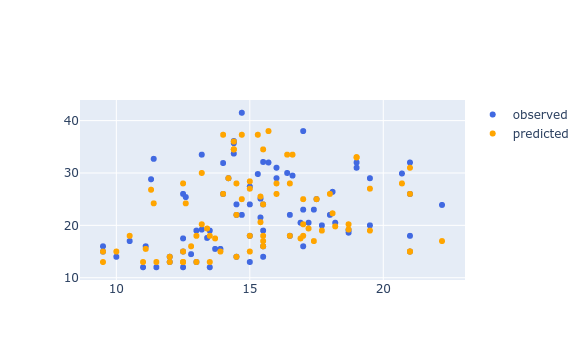

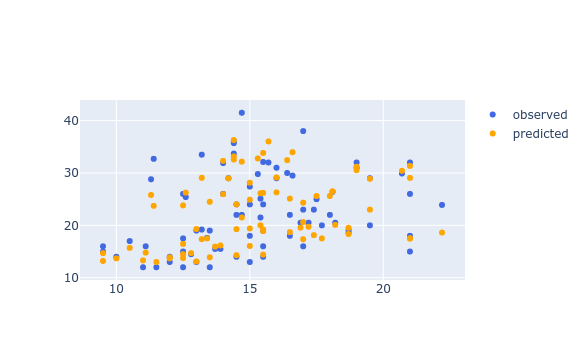

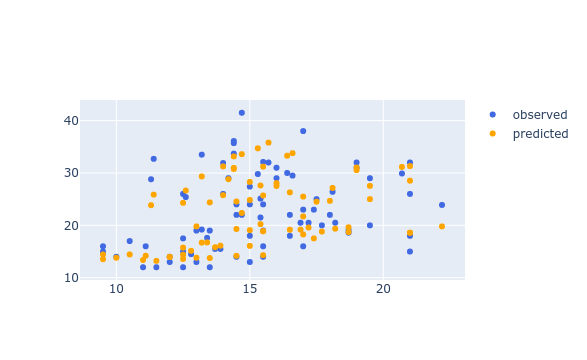

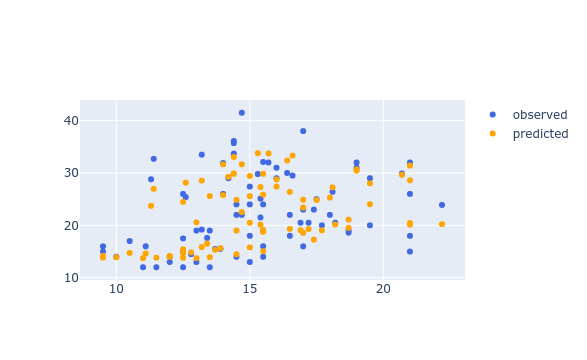

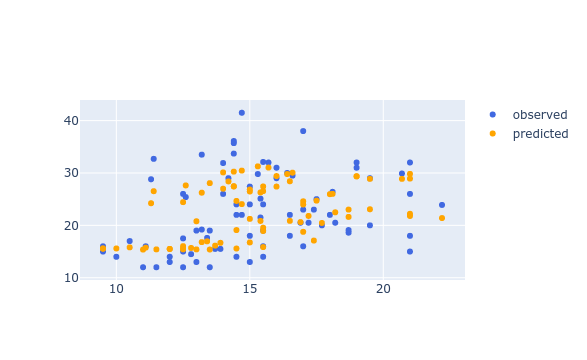

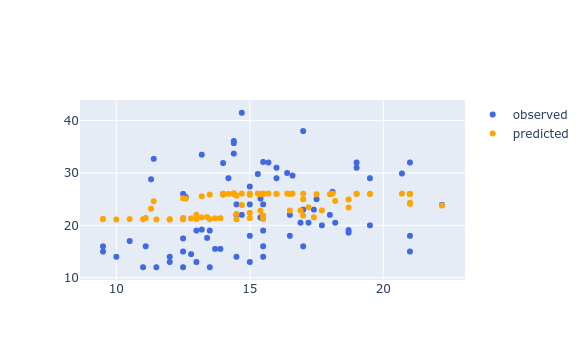

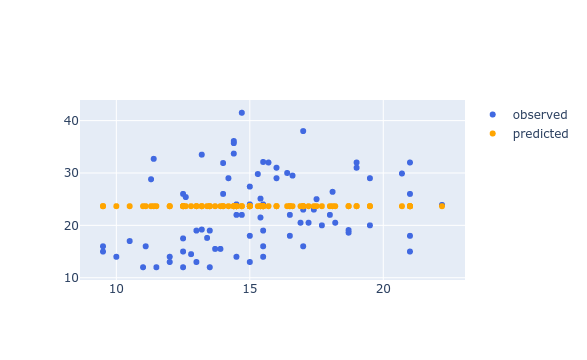

In [17]:
import math

for j in [1, 10, 25, 50, 100, 250, 313]:
  std_clf = pipe.make_pipeline(pp.StandardScaler(), neighbors.KNeighborsRegressor(n_neighbors = j))
  (std_clf.fit(splits[0], np.ravel(splits[2])))
  predictions = std_clf.predict(splits[1])
  rmse = math.sqrt(metrics.mean_squared_error(splits[3], predictions))
  fig = go.Figure()
  Xtest = splits[1]
  acceleration = Xtest[['acceleration']]
  (fig.add_scatter(x= (np.ravel(acceleration)), y= (np.ravel(splits[3])), mode="markers", name="observed", line=dict(color='royalblue')))
  (fig.add_scatter(x= (np.ravel(acceleration)), y= (np.ravel(predictions)), mode="markers", name="predicted", line=dict(color='orange')))
  (fig.show())

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="nr%W_%EA(*n$_f,PuH#c">j</variable><variable id="`P)`+jl|;h{.[r}{78q6">std_clf</variable><variable id="=z9KfSBWpoDS,oj-?yx,">pipe</variable><variable id="=`)h;YQmtv}6uka]9EYT">predictions</variable><variable id=".T`xqZHAu7r0$MQ4s=Yg">pp</variable><variable id="MvUG^P$o3=I*6/67?Rk:">neighbors</variable><variable id="RN+myW;vx){}Q0LuFA9y">rmse</variable><variable id="Zhzp)s*VL?V@ES3(j:*b">np</variable><variable id="@U5l^JIp,}.H=ECCW?@g">fig</variable><variable id="_ut$e0PL4OMi4o1MXTpw">splits</variable><variable id=")}+w@N9iB/j=:+PLkMv8">metrics</variable><variable id="`iml3^SQ8#}M{aSRdsjz">go</variable><variable id="fe.98]:,bU@x*=}zaJ1/">Xtest</variable><variable id="EgaJ]?Hcx@h7lNxxzP4V">acceleration</variable></variables><block type="controls_forEach" id="MbWYZ/u3Q#+3*u`TM}ce" x="243" y="334"><field name="VAR" id="nr%W_%EA(*n$_f,PuH#c">j</field><value name="LIST"><block type="lists_create_with" id="Q6_EXa41T:y(.uy[pm.V"><mutation items="6"></mutation><value name="ADD0"><block type="math_number" id="+BJ@yT0IgJORgO^/))c~"><field name="NUM">1</field></block></value><value name="ADD1"><block type="math_number" id=".~r[qy7$p-Jy_g:ACHYr"><field name="NUM">10</field></block></value><value name="ADD2"><block type="math_number" id="w!m`o}C;PB7OhYP5ZTq~"><field name="NUM">25</field></block></value><value name="ADD3"><block type="math_number" id="?!EK)M.j{u~@|;ytL|nd"><field name="NUM">50</field></block></value><value name="ADD4"><block type="math_number" id="cLtaU]#w-;S(sUq8pw/l"><field name="NUM">100</field></block></value><value name="ADD5"><block type="math_number" id="910qY[[4~4nziBPT;K+G"><field name="NUM">250</field></block></value></block></value><statement name="DO"><block type="variables_set" id="8APEX{xGs3Qz/$NzTFrY"><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><value name="VALUE"><block type="varDoMethod_Python" id="W=ep`rJjDXvsAV^R+NIG"><field name="VAR" id="=z9KfSBWpoDS,oj-?yx,">pipe</field><field name="MEMBER">make_pipeline</field><data>pipe:make_pipeline</data><value name="INPUT"><block type="lists_create_with" id="ed7Q+#-kPzf4R,8)[q_Z"><mutation items="2"></mutation><value name="ADD0"><block type="varCreateObject_Python" id="ME+Z@t~BnN}LL22r%Hxt"><field name="VAR" id=".T`xqZHAu7r0$MQ4s=Yg">pp</field><field name="MEMBER">StandardScaler</field><data>pp:StandardScaler</data></block></value><value name="ADD1"><block type="varCreateObject_Python" id="p=kmgsx6gSLD(RSPi]We"><field name="VAR" id="MvUG^P$o3=I*6/67?Rk:">neighbors</field><field name="MEMBER">KNeighborsRegressor</field><data>neighbors:KNeighborsRegressor</data><value name="INPUT"><block type="lists_create_with" id="%{hTJRYu`A$B-B}N|W^|"><mutation items="1"></mutation><value name="ADD0"><block type="dummyOutputCodeBlock_Python" id="4*MO9`pDvGbjv^%|]#Jm"><field name="CODE">n_neighbors = j</field></block></value></block></value></block></value></block></value></block></value><next><block type="valueNoOutputCodeBlock_Python" id="nCe{WO~.SVUJ*REfHN;r"><field name="CODE"></field><value name="INPUT"><block type="varDoMethod_Python" id="Fm%sV]3?)?kc0h:9S9IQ"><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><field name="MEMBER">fit</field><data>std_clf:fit</data><value name="INPUT"><block type="lists_create_with" id="bkqo.bU~bUHGJR3.PCNj"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="c-OmE5.Qf*x_-O+oEcL("><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="xDX74mH}[mNJlpBTYt{)"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="qrLzq]pv]HBj!dNAu-9i"><field name="NUM">1</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_Python" id="?U(hh`0ZFjUnfsrL}xQK"><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="INPUT"><block type="lists_create_with" id="(UU{x68[{=A[p}uG##Eq"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="kcy}-[{;=}P{onxAUnZc"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="di`_Ko4qTbeTQ^v!pa2A"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id=",i2p$Oad~vpnzpz8YDss"><field name="NUM">3</field></block></value></block></value></block></value></block></value></block></value></block></value><next><block type="variables_set" id="t4FH|^O1fvcXbQ/%eX{o"><field name="VAR" id="=`)h;YQmtv}6uka]9EYT">predictions</field><value name="VALUE"><block type="varDoMethod_Python" id="@~[XlP)bAA[7?k^=6%J2"><field name="VAR" id="`P)`+jl|;h{.[r}{78q6">std_clf</field><field name="MEMBER">predict</field><data>std_clf:predict</data><value name="INPUT"><block type="lists_create_with" id="~`MOj}QguYf}BCZOc7C!"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="h$p4(I@O~CtLDZv)+/nX"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="Kh1qgk~(:R(}S`sfh}?{"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="jyi_*c[[~,{K#t[0Gghj"><field name="NUM">2</field></block></value></block></value></block></value></block></value><next><block type="variables_set" id="6eYPMqa.T*II`(7!/U;_"><field name="VAR" id="RN+myW;vx){}Q0LuFA9y">rmse</field><value name="VALUE"><block type="math_single" id="SI.B#46RorSW7}ZGS{D-"><field name="OP">ROOT</field><value name="NUM"><shadow type="math_number"><field name="NUM">9</field></shadow><block type="varDoMethod_Python" id="7PlC*+UVpHU@Lyq2@_?h"><field name="VAR" id=")}+w@N9iB/j=:+PLkMv8">metrics</field><field name="MEMBER">mean_squared_error</field><data>metrics:mean_squared_error</data><value name="INPUT"><block type="lists_create_with" id="ExgoS4A$UNPym77J;1L2"><mutation items="2"></mutation><value name="ADD0"><block type="lists_getIndex" id="JoSeD*7Q$:S1sXw#)5=+"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="OR=]poUbkR)eqh!eV:XW"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="gJ*8#!h/B4O65oy_[TKL"><field name="NUM">4</field></block></value></block></value><value name="ADD1"><block type="variables_get" id="::s[{k@xAHJRWvDND!GY"><field name="VAR" id="=`)h;YQmtv}6uka]9EYT">predictions</field></block></value></block></value></block></value></block></value><next><block type="variables_set" id="ly8Y%ii[8GCym5M*XTf}"><field name="VAR" id="@U5l^JIp,}.H=ECCW?@g">fig</field><value name="VALUE"><block type="varCreateObject_Python" id="*$hJU`,ji-A.;_nb@km1"><field name="VAR" id="`iml3^SQ8#}M{aSRdsjz">go</field><field name="MEMBER">Figure</field><data>go:Figure</data></block></value><next><block type="variables_set" id="J,6}A2Mb!EQZOI!{V:9H"><field name="VAR" id="fe.98]:,bU@x*=}zaJ1/">Xtest</field><value name="VALUE"><block type="lists_getIndex" id="VotoH{8,LACPdpr`.Vxw"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="O78X_lz]+16l~O.Ay(4e"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="Agua]uU.:5;nuCEv;N|B"><field name="NUM">2</field></block></value></block></value><next><block type="variables_set" id="PJ}W61Uv8i.i{pv[R2^3"><field name="VAR" id="EgaJ]?Hcx@h7lNxxzP4V">acceleration</field><value name="VALUE"><block type="indexer_Python" id="`U,WtQ-s/ykG-@M*EK]7"><field name="VAR" id="fe.98]:,bU@x*=}zaJ1/">Xtest</field><value name="INDEX"><block type="lists_create_with" id="L.hd1^CnlDB3x!GMGz}="><mutation items="1"></mutation><value name="ADD0"><block type="text" id="oZKzm-$w[`POLd2qMF]e"><field name="TEXT">acceleration</field></block></value></block></value></block></value><next><block type="valueNoOutputCodeBlock_Python" id="/s$Qh28XukGb2gUj2OWB"><field name="CODE"></field><value name="INPUT"><block type="varDoMethod_Python" id="Y1(!(t5FFL~;23e-;6gJ"><field name="VAR" id="@U5l^JIp,}.H=ECCW?@g">fig</field><field name="MEMBER">add_scatter</field><data>fig:add_scatter</data><value name="INPUT"><block type="lists_create_with" id="a2|.[Q@0L=yJb^s.8$w."><mutation items="5"></mutation><value name="ADD0"><block type="valueOutputCodeBlock_Python" id="N*q=?9PqN]MO|!!`{Eq`"><field name="CODE">x=</field><value name="INPUT"><block type="varDoMethod_Python" id="hQ+wE5av9_j:u6=FR=?d"><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="INPUT"><block type="variables_get" id="?[LkY1#}B,-$gkZ2UP-["><field name="VAR" id="EgaJ]?Hcx@h7lNxxzP4V">acceleration</field></block></value></block></value></block></value><value name="ADD1"><block type="valueOutputCodeBlock_Python" id="ahplOH@}vlb))m4|31QY"><field name="CODE">y=</field><value name="INPUT"><block type="varDoMethod_Python" id="{yJH?z+#EcbC(ao)Pq5:"><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="INPUT"><block type="lists_create_with" id="`J@:zU3oLv_m/WBQ??V2"><mutation items="1"></mutation><value name="ADD0"><block type="lists_getIndex" id="TfOa2mb)`cudJ37_.#^j"><mutation statement="false" at="true"></mutation><field name="MODE">GET</field><field name="WHERE">FROM_START</field><value name="VALUE"><block type="variables_get" id="z]]tGE^y*u-Yt0`6:E,R"><field name="VAR" id="_ut$e0PL4OMi4o1MXTpw">splits</field></block></value><value name="AT"><block type="math_number" id="j._f*92QG,LQ}i/KYmIX"><field name="NUM">4</field></block></value></block></value></block></value></block></value></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_Python" id="wQNJeKP:stn|%9IUW`Hl"><field name="CODE">mode="markers"</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock_Python" id="QibO1)jRKxHvM`evVE;X"><field name="CODE">name="observed"</field></block></value><value name="ADD4"><block type="dummyOutputCodeBlock_Python" id="MkeHG0#jErC_$XDy6OrV"><field name="CODE">line=dict(color='royalblue')</field></block></value></block></value></block></value><next><block type="valueNoOutputCodeBlock_Python" id="UJNyljvgb6I@6(}sAHZZ"><field name="CODE"></field><value name="INPUT"><block type="varDoMethod_Python" id="@fek{ap(4wuJsXT@I=6{"><field name="VAR" id="@U5l^JIp,}.H=ECCW?@g">fig</field><field name="MEMBER">add_scatter</field><data>fig:add_scatter</data><value name="INPUT"><block type="lists_create_with" id="J5.TT2`{2@}RHSuDIB0{"><mutation items="5"></mutation><value name="ADD0"><block type="valueOutputCodeBlock_Python" id="55F^eU)]iA?MZjx.rfuZ"><field name="CODE">x=</field><value name="INPUT"><block type="varDoMethod_Python" id="mjwxWM6lf+^zVv1OwljZ"><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="INPUT"><block type="variables_get" id="z90VdIa4VqKp#tGV7!ZT"><field name="VAR" id="EgaJ]?Hcx@h7lNxxzP4V">acceleration</field></block></value></block></value></block></value><value name="ADD1"><block type="valueOutputCodeBlock_Python" id="1+/b%|a4Pyk~I]ErNF~-"><field name="CODE">y=</field><value name="INPUT"><block type="varDoMethod_Python" id=":)IwC?Ls-bfh]_l)cB:`"><field name="VAR" id="Zhzp)s*VL?V@ES3(j:*b">np</field><field name="MEMBER">ravel</field><data>np:ravel</data><value name="INPUT"><block type="variables_get" id="Yj]L(/3RO$fE=(i/jC}*"><field name="VAR" id="=`)h;YQmtv}6uka]9EYT">predictions</field></block></value></block></value></block></value><value name="ADD2"><block type="dummyOutputCodeBlock_Python" id="^m/w9f{hC4hQU7qz}K/0"><field name="CODE">mode="markers"</field></block></value><value name="ADD3"><block type="dummyOutputCodeBlock_Python" id="9OXU9?*]2m8T.hM-Ht(#"><field name="CODE">name="predicted"</field></block></value><value name="ADD4"><block type="dummyOutputCodeBlock_Python" id="|/6Hflsqp-[u9m%x.Bd="><field name="CODE">line=dict(color='orange')</field></block></value></block></value></block></value><next><block type="valueNoOutputCodeBlock_Python" id="{3:dbaV{zeIgzBQ[cITw"><field name="CODE"></field><value name="INPUT"><block type="varDoMethod_Python" id="d`.PvpHI)X*_f4k7qIb%"><field name="VAR" id="@U5l^JIp,}.H=ECCW?@g">fig</field><field name="MEMBER">show</field><data>fig:show</data></block></value></block></next></block></next></block></next></block></next></block></next></block></next></block></next></block></next></block></next></block></statement></block></xml>

dataframe.describe()

In [15]:
dataframe.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000
